# Hito 1: “Análisis de datos de características musicales en Spotify”

Integrantes : Juan Balboa E., Sebastian Cadena A., Benjamin Fuentes R., Matias Mendez Z., Camila Rojas G.


Regresión lineal para predecir popularidad a partir de métricas sobre la canción, sin considerar el nombre del artista.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


file_name = 'dataset.csv'
df = pd.read_csv(file_name)
df['explicit'] = df['explicit'].astype(int)

train_df, test_df = train_test_split(df, test_size=0.2, random_state=666)


features_to_use = [
    'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
    'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence',
    'tempo', 'time_signature', 'track_genre'
]
# sets entrenamiento y prueba
y_train = train_df['popularity']
y_test = test_df['popularity']

X_train = train_df[features_to_use]
X_test = test_df[features_to_use]
# convertimos columnas de género en columnas numéricas
X_train= pd.get_dummies(X_train, columns=['track_genre'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['track_genre'], drop_first=True)


# forzamos a que ambos conjuntos tengan las mismas columnas de género

train_cols = X_train.columns
test_cols = X_test.columns
missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test[c] = 0
missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train[c] = 0
X_test = X_test[train_cols] # asegura el mismo orden



linear_model = LinearRegression(n_jobs=-1)
linear_model.fit(X_train, y_train)
predictions = linear_model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)


print(f"Error Absoluto Medio (MAE): {mae}")
print(f"Coeficiente de Determinación (R²): {r2}")

Error Absoluto Medio (MAE): 14.07172419404308
Coeficiente de Determinación (R²): 0.26154073338005457


Probamos con random forest regressor

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=666, n_jobs=-1)
rf_regressor.fit(X_train, y_train)

rf_predictions = rf_regressor.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f"RandomForestRegressor - MAE: {rf_mae}")
print(f"RandomForestRegressor - R²: {rf_r2}")

#se demoro 1 min 20 segundos en correr

RandomForestRegressor - MAE: 10.403142644859184
RandomForestRegressor - R²: 0.5224642151505604


Ahora estudiamos la populariad usando random forest classifier, para lo cual convertimos la popularidad en categorías

Precisión (Accuracy): 0.7682017543859649

Reporte de Clasificación:
              precision    recall  f1-score   support

 Muy Popular       0.73      0.41      0.52      2714
Poco Popular       0.79      0.92      0.85     13465
     Popular       0.73      0.61      0.66      6621

    accuracy                           0.77     22800
   macro avg       0.75      0.64      0.68     22800
weighted avg       0.76      0.77      0.76     22800


Matriz de Confusión:


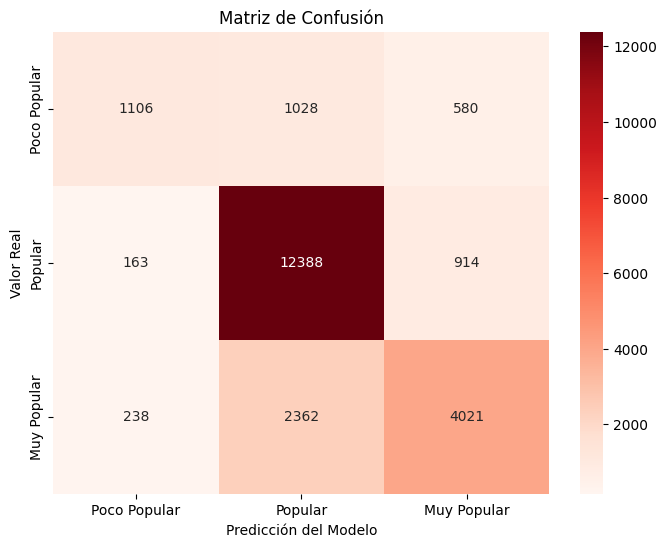

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


file_name = 'dataset.csv'
df = pd.read_csv(file_name)
# pasamos explicit a numerico
df['explicit'] = df['explicit'].astype(int)

#le damos una etiqueta a cada cancion segun su popularidad
bins = [-1, 40, 60, 101]
labels = ['Poco Popular', 'Popular', 'Muy Popular']
df['popularity_category'] = pd.cut(df['popularity'], bins=bins, labels=labels)


# usamos stratify para mantener la proporción en train y test
train_df, test_df = train_test_split(df, test_size=0.2, random_state=666, stratify=df['popularity_category'])

features_to_use = [
    'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
    'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence',
    'tempo', 'time_signature', 'track_genre'
]

# sets entrenamiento y prueba
y_train = train_df['popularity_category']
y_test = test_df['popularity_category']

X_train = train_df[features_to_use]
X_test = test_df[features_to_use]

# convertimos columnas de género en columnas numéricas
X_train = pd.get_dummies(X_train, columns=['track_genre'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['track_genre'], drop_first=True)

# forzamos a que ambos conjuntos tengan las mismas columnas de género
train_cols = X_train.columns
test_cols = X_test.columns
missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test[c] = 0
X_test = X_test[train_cols] # asegura el mismo orden


clf_model = RandomForestClassifier(n_estimators=100, random_state=666, n_jobs=-1)

clf_model.fit(X_train, y_train)

predictions = clf_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print(f"Precisión (Accuracy): {accuracy}")
print("\nReporte de Clasificación:")
print(report)


print("\nMatriz de Confusión:")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt = 'd',cmap='Reds', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicción del Modelo')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

#con n_jobs=-1 se demora 12 seg. Con n_jobs=1 se demora 45 seg.